<h1>Creating the training and test data for the NN</h1>
<h2>This will involve spinning up the simulation, identifying the points in the densest 10% of the sim, calculating the tidal vectors at these points and returning a tuple of the point, the tidal vector, and the density field?

In [1]:
#Create test graph from nbodykit

from src.nn_graph import *
from nbodykit.lab import *
from nbodykit import style, setup_logging
from pmesh.pm import ParticleMesh

redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')

BoxSize=1380
nbar=3e-3
bias=1.0
seed=42
nmesh = 256

#Will want to vary the bias and nbar
cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=1.0, seed=42)

#extract particle positions from catalogue
mesh = cat.to_mesh(resampler='tsc')

<class 'pmesh.pm.RealField'>
mean of 1+delta =  1.0000004
min of 1+delta =  0.0
max of 1+delta =  18.71194


Text(0.5, 1.0, 'Slice of Density Field')

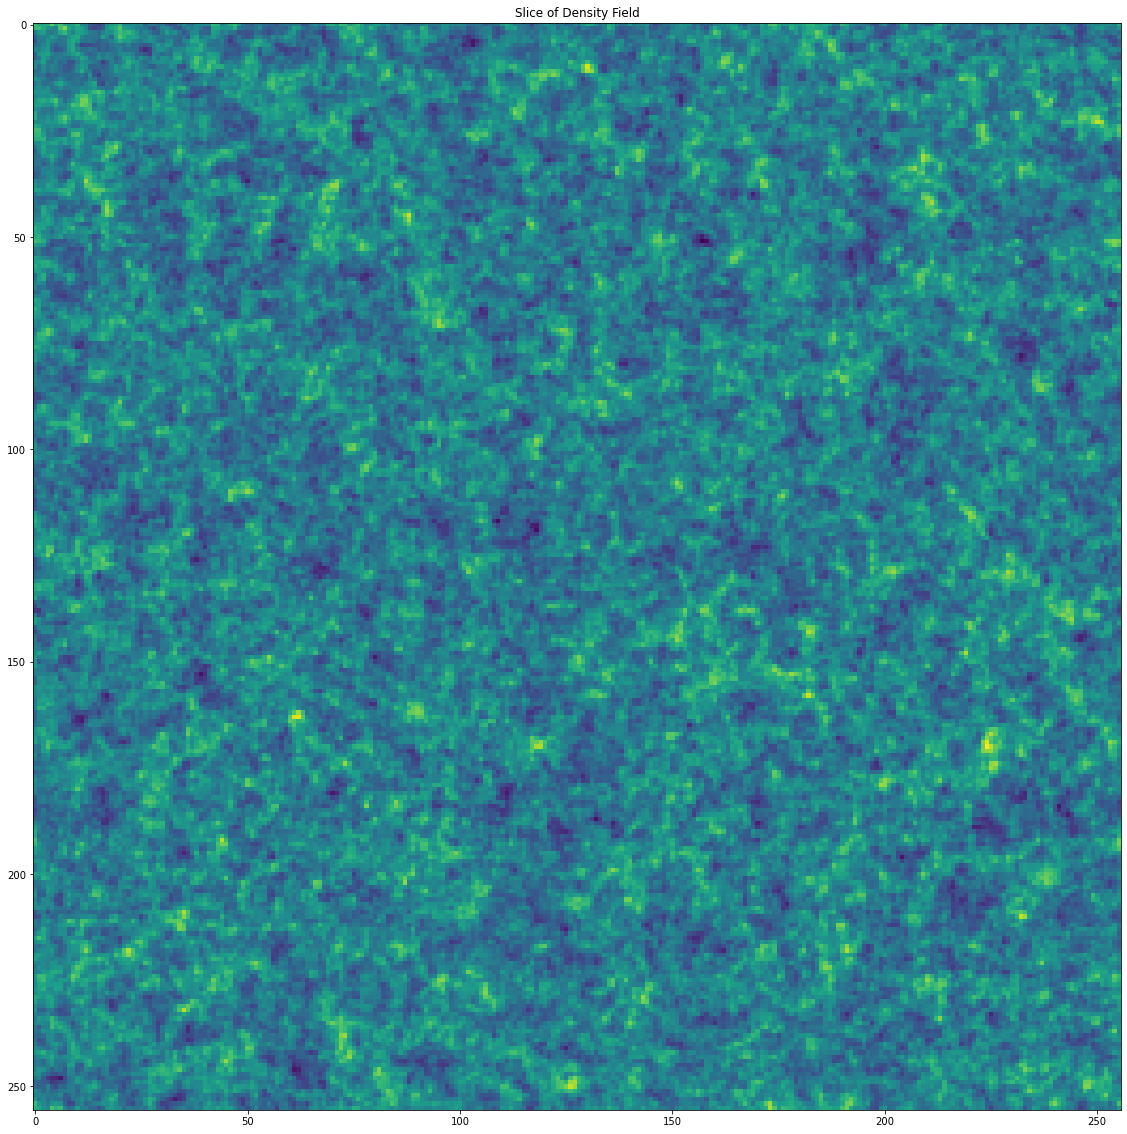

In [2]:
one_plus_delta = mesh.paint(mode='real')
print(type(one_plus_delta))

print("mean of 1+delta = ", one_plus_delta.value.mean())
print("min of 1+delta = ", one_plus_delta.value.min())
print("max of 1+delta = ", one_plus_delta.value.max())

plt.figure(figsize = (20,20))
plt.imshow(one_plus_delta.preview(axes=[0,1]))
plt.title("Slice of Density Field")

In [3]:
from src.tidal_vectors import *

tidal_results = calculate_tidal_vecs(mesh)



Density painted
Rho computed


Text(0.5, 1.0, 'Slice of Rho After Lowpass Filtering')

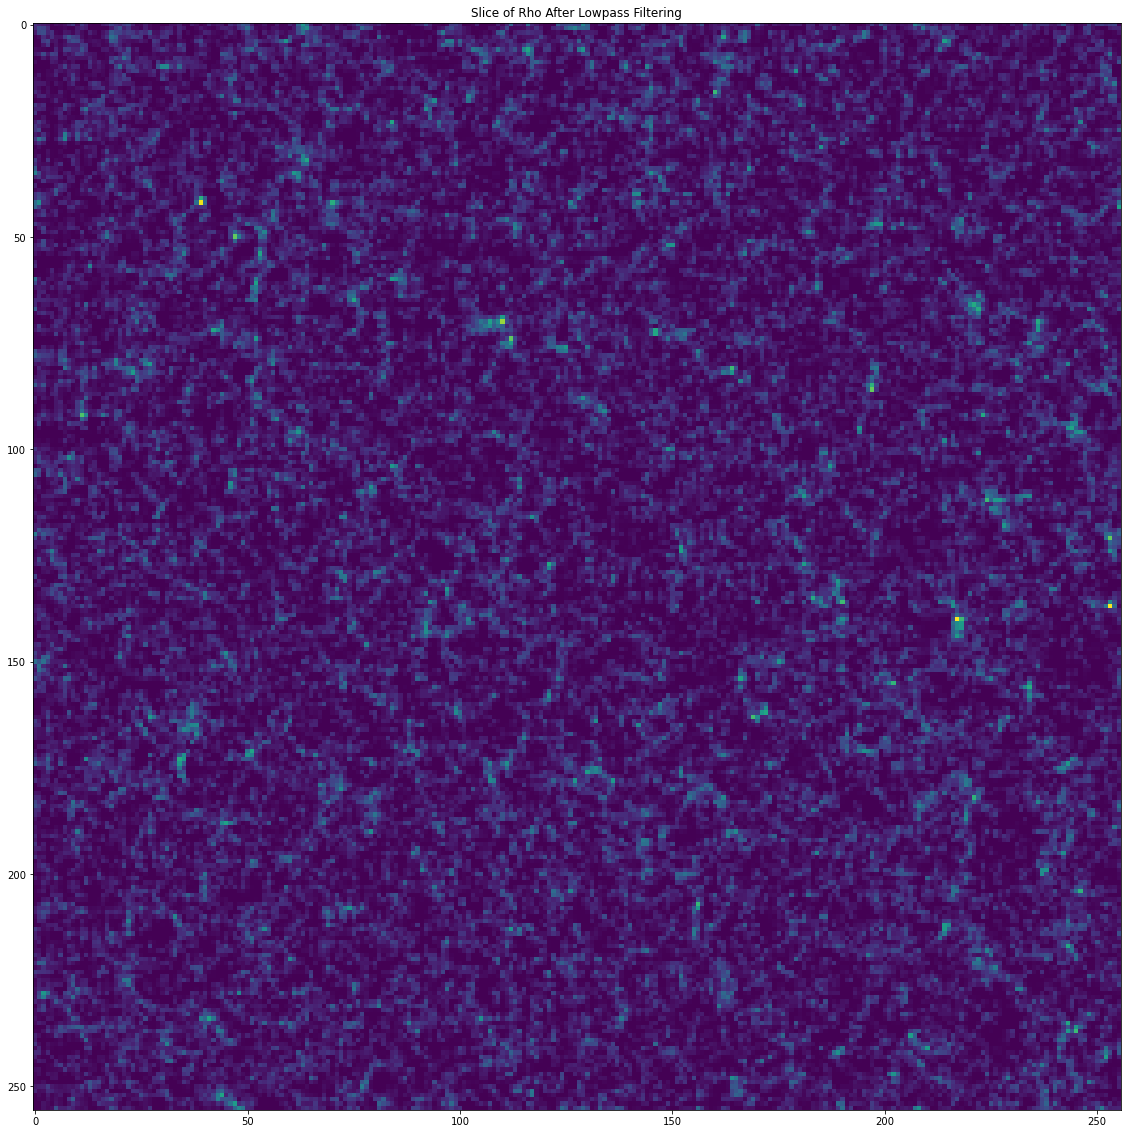

In [4]:
plt.figure(figsize = (20,20))
plt.imshow(tidal_results[3][0,:,:])
plt.title("Slice of Rho After Lowpass Filtering")

<h2> Select top 10% of values in density field, and get their positions </h2>

In [5]:
vects = tidal_results[2]
rho = tidal_results[3]

In [6]:
tidal_results

(array([1.80957006, 1.39347746, 1.12444651, ..., 2.72930303, 0.45029162,
        1.80957006]),
 array([[ -3.27321195,   2.33460544,  24.46377179],
        [ -6.04204104,   6.25585021,  11.22018853],
        [-12.76224652,  -4.76752078,  21.14603834],
        ...,
        [ -4.97822918,  12.71185253,  42.51791294],
        [-26.35886476,  -7.08738637,  17.4723645 ],
        [ -3.27321195,   2.33460544,  24.46377179]]),
 array([[[-0.41248584,  0.90769459, -0.07711011],
         [ 0.42075375,  0.11475728, -0.89988724],
         [ 0.80797383,  0.40363511,  0.42925166]],
 
        [[-0.66679916,  0.24471186,  0.70391405],
         [-0.00317103,  0.94360978, -0.3310446 ],
         [-0.74523072, -0.2229724 , -0.62842222]],
 
        [[-0.52479613,  0.57927213, -0.62372496],
         [-0.85003341, -0.31782471,  0.4200365 ],
         [ 0.04508024,  0.75062058,  0.65919384]],
 
        ...,
 
        [[ 0.81786359, -0.27881621, -0.50334945],
         [ 0.40975715, -0.33193589,  0.84965737],
    

In [7]:
rho_flat = rho.flatten()

AttributeError: 'RealField' object has no attribute 'flatten'

In [8]:
vects

array([[[-0.41248584,  0.90769459, -0.07711011],
        [ 0.42075375,  0.11475728, -0.89988724],
        [ 0.80797383,  0.40363511,  0.42925166]],

       [[-0.66679916,  0.24471186,  0.70391405],
        [-0.00317103,  0.94360978, -0.3310446 ],
        [-0.74523072, -0.2229724 , -0.62842222]],

       [[-0.52479613,  0.57927213, -0.62372496],
        [-0.85003341, -0.31782471,  0.4200365 ],
        [ 0.04508024,  0.75062058,  0.65919384]],

       ...,

       [[ 0.81786359, -0.27881621, -0.50334945],
        [ 0.40975715, -0.33193589,  0.84965737],
        [-0.40397799, -0.90115486, -0.15723134]],

       [[-0.02913435,  0.862499  , -0.50521943],
        [ 0.1960161 ,  0.50055024,  0.84322426],
        [ 0.98016778, -0.07446435, -0.1836469 ]],

       [[-0.41248584,  0.90769459, -0.07711011],
        [ 0.42075375,  0.11475728, -0.89988724],
        [ 0.80797383,  0.40363511,  0.42925166]]])

<h2> Do same as above, but for a different bias and nbar </h2>

Density painted
Rho computed


Text(0.5, 1.0, 'Slice of Rho After Lowpass Filtering')

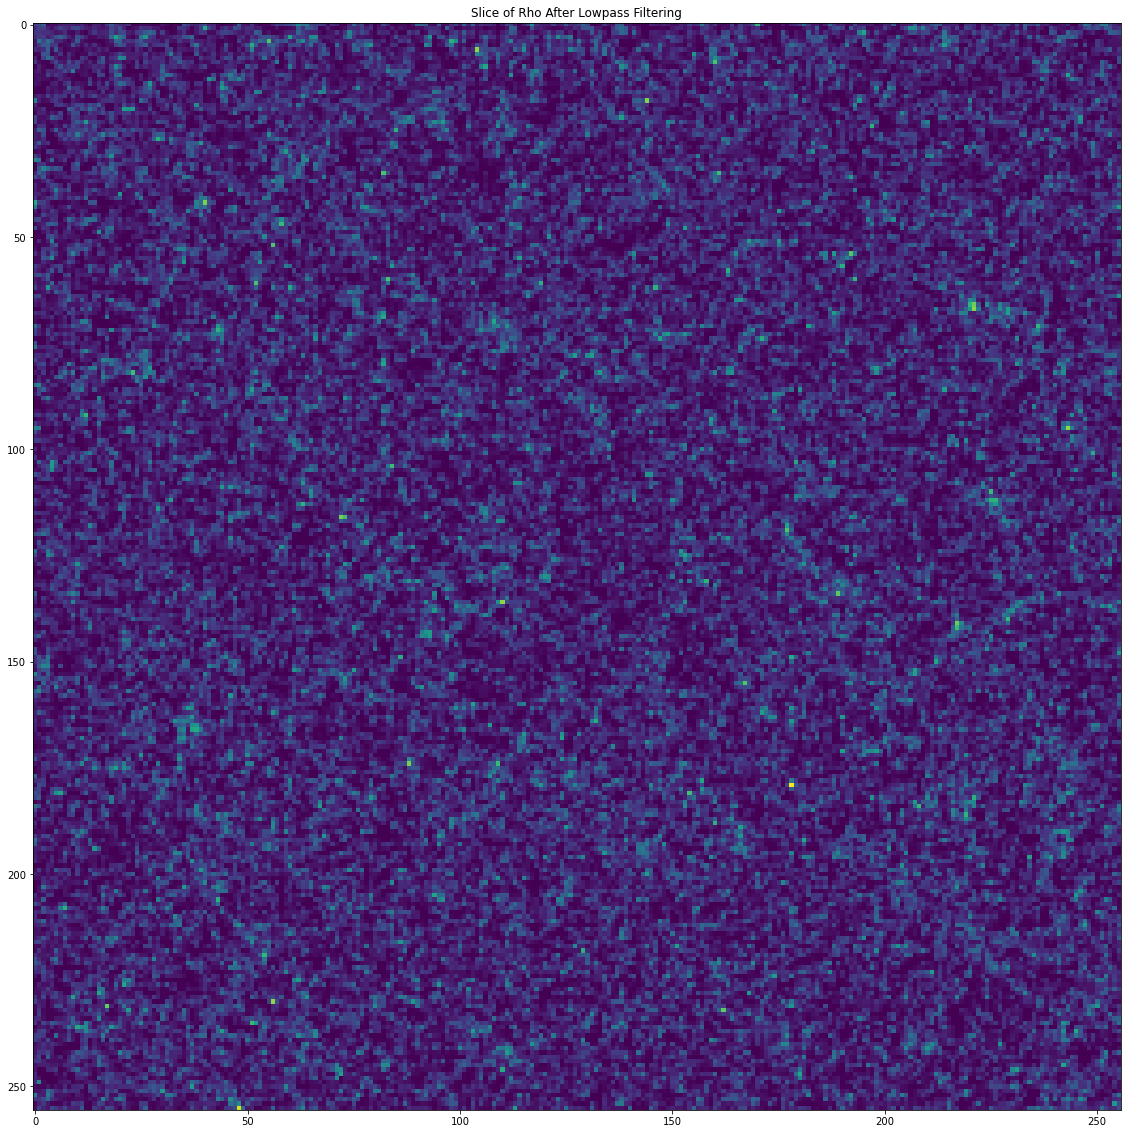

In [10]:
#Will want to vary the bias and nbar
bias = 0.5
cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=bias, seed=42)

#extract particle positions from catalogue
b_mesh = cat.to_mesh(resampler='tsc')

b_tidal_results = calculate_tidal_vecs(b_mesh)

plt.figure(figsize = (20,20))
plt.imshow(b_tidal_results[3][0,:,:])
plt.title("Slice of Rho After Lowpass Filtering")

In [22]:
biases = []

<h2> For demonstration purposes, plot a density slice for each value of bias</h2>


In [23]:
for i in range(1,7):
    bias = i * 0.5
    cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=bias, seed=42)

    #extract particle positions from catalogue
    meshes = cat.to_mesh(resampler='tsc')

    biases.append(calculate_tidal_vecs(meshes)[3])


Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed


In [17]:
biases

[RealField:array([[[1.76885408e+00, 1.89858366e+00, 2.84112688e+00, ...,
          1.71931022e+00, 9.53889408e-01, 5.39821375e-01],
         [9.74289520e-01, 1.61171113e+00, 1.76265922e+00, ...,
          2.41119785e+00, 1.01258732e+00, 1.33493019e+00],
         [1.40467316e+00, 1.41584935e+00, 1.25899971e+00, ...,
          2.84132774e+00, 2.57993851e+00, 2.18019802e+00],
         ...,
         [1.36811730e+00, 1.21659038e+00, 2.05601463e+00, ...,
          4.94771420e-01, 1.06562547e+00, 1.25178874e+00],
         [2.18705669e-01, 8.20482771e-01, 1.47724359e+00, ...,
          4.80339694e-01, 4.87573796e+00, 2.04559741e+00],
         [4.15016370e-01, 1.85479041e+00, 9.10782801e-01, ...,
          9.56267425e-01, 1.14083345e+00, 2.06625287e+00]],
 
        [[1.42081757e+00, 1.37012284e+00, 3.06660942e+00, ...,
          2.20032175e+00, 2.48620172e-01, 6.20129107e-01],
         [1.99597317e+00, 1.16733444e+00, 1.51798513e+00, ...,
          2.92852174e+00, 1.23162042e+00, 1.45090369e+00

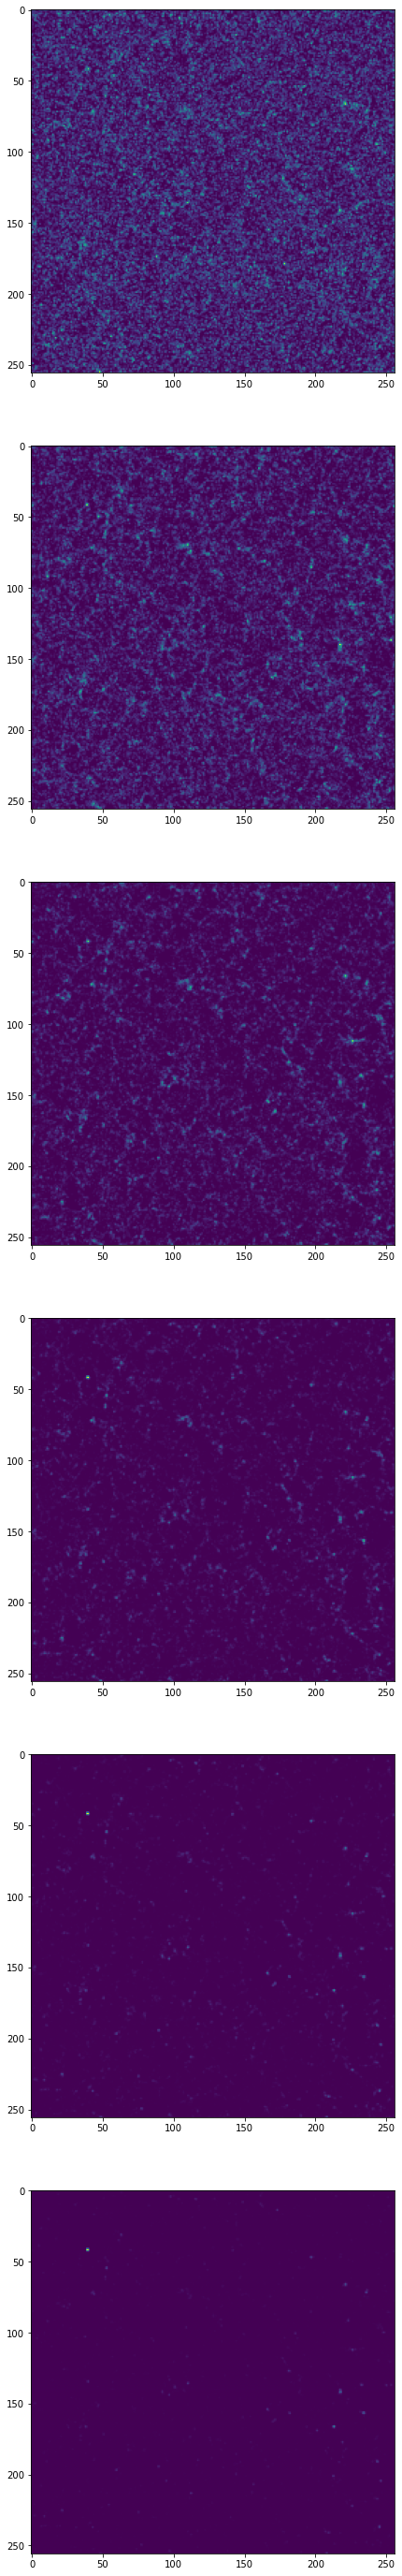

In [53]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1,figsize=(50,50))
ax1.imshow(biases[0][0])
ax2.imshow(biases[1][0])
ax3.imshow(biases[2][0])
ax4.imshow(biases[3][0])
ax5.imshow(biases[4][0])
ax6.imshow(biases[5][0])

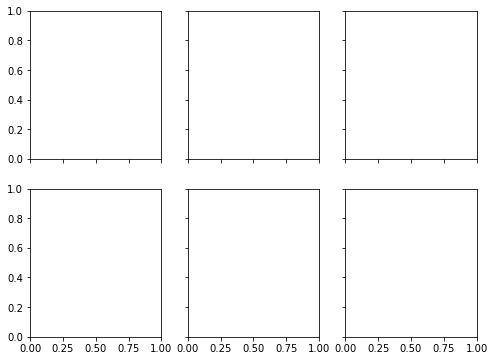

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharex=True, sharey=True)

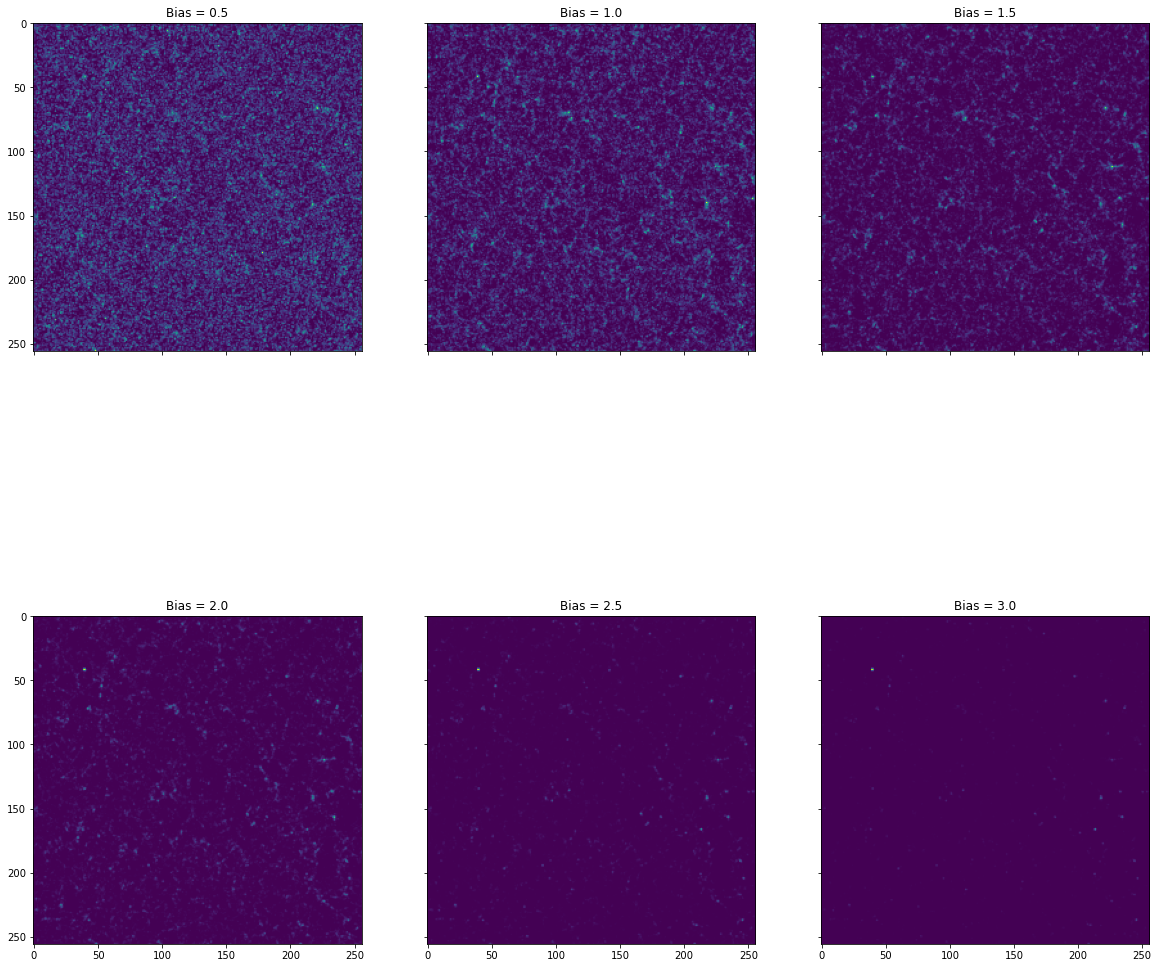

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20,20), sharex=True, sharey=True)
axes[0,0].imshow(biases[0][0])
axes[0,0].set_title("Bias = 0.5")

axes[0,1].imshow(biases[1][0])
axes[0,1].set_title("Bias = 1.0")

axes[0,2].imshow(biases[2][0])
axes[0,2].set_title("Bias = 1.5")

axes[1,0].imshow(biases[3][0])
axes[1,0].set_title("Bias = 2.0")

axes[1,1].imshow(biases[4][0])
axes[1,1].set_title("Bias = 2.5")

axes[1,2].imshow(biases[5][0])
axes[1,2].set_title("Bias = 3.0")
plt.show()